In [1]:
import scipy.stats as stats
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv('tipsdataset.csv')

In [9]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
dataset_table = pd.crosstab(dataset['sex'], dataset['smoker'])
print(dataset_table)

smoker  No  Yes
sex            
Female  54   33
Male    97   60


In [11]:
print(len(dataset['sex']))

244


In [12]:
observed_values = dataset_table.values
print("observed values: \n", observed_values)

observed values: 
 [[54 33]
 [97 60]]


In [13]:
val = stats.chi2_contingency(dataset_table)#returns test stat, p-value, degree of freedom, expected values
val

(0.0,
 1.0,
 1,
 array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

In [14]:
expected_values = val[3]

In [15]:
no_of_rows = len(dataset_table.iloc[0:2,0])
no_of_columns = len(dataset_table.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)#degree of freedom
print("Degree of Freedom: ", ddof)
alpha = 0.05

Degree of Freedom:  1


# Chi square implementation

In [17]:
from scipy.stats import chi2
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
print(chi_square)
chi_square_statistics = chi_square[0]+chi_square[1]

[0.00073745 0.00119737]


In [18]:
critical_value = chi2.ppf(q=1-alpha,df=ddof)#from critical values of chi2 distribution table
print(critical_value)

3.841458820694124


In [20]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistics,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1


In [21]:
if p_value>critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


# T-test


In [2]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [3]:
import numpy as np
ages_mean = np.mean(ages)
print(ages_mean)

30.34375


In [4]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [5]:
from scipy.stats import ttest_1samp

In [6]:
ttest,p_value=ttest_1samp(age_sample,30)

In [9]:
print(p_value)

0.6898383122226028


In [10]:
print(ttest)

0.4121993244455997


In [8]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis and reject the alternate hypothesis")

we are accepting null hypothesis


# Some More Examples


In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [12]:
classA_ages.mean()

46.9

In [13]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [14]:
p_value

1.139027071016194e-13

In [15]:
school_ages.mean()

53.303333333333335

In [16]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

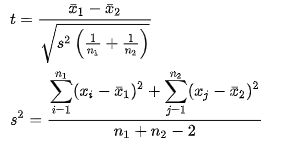

In [17]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [18]:
_,p_value=stats.ttest_ind(a=classA_height,b=ClassB_ages,equal_var=False)

NameError: name 'classA_height' is not defined

In [19]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [20]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [22]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[16.1845637  24.93234756 27.99601605 25.80095696 21.85237039 33.36380814
 33.19646047 28.63874933 28.9100301  34.41607782 21.43952644 27.08685451
 33.96370697 34.13369994 46.03845269]


In [23]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [24]:
weight_df

,weight_10,weight_20,weight_change
0,25,16.184564,-8.815436
1,30,24.932348,-5.067652
2,28,27.996016,-0.003984
3,35,25.800957,-9.199043
4,28,21.852370,-6.147630
5,34,33.363808,-0.636192
6,26,33.196460,7.196460
7,29,28.638749,-0.361251
8,30,28.910030,-1.089970
9,26,34.416078,8.416078


# Correlation


In [25]:
import seaborn as sns
df=sns.load_dataset('iris')


In [26]:
df.shape

(150, 5)